In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
#数据观察
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
#空值处理
df["salary"]=df["salary"].fillna(0)

In [7]:
#数据预处理：对离散变量进行编码
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical = ["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","specialisation","status"]
for i in categorical:
    df[i]=le.fit_transform(df[i]) 

In [8]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [9]:
#删除无关列
df=df.drop("sl_no",axis=1)

In [10]:
#分类
import copy
df_class = copy.deepcopy(df)
df_class=df_class.drop("salary",axis=1)

In [11]:
#数据划分
from sklearn.model_selection import train_test_split
X = df_class.iloc[:,:-1].values
y = df_class.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
print(X_train.shape,X_test.shape)

(182, 12) (33, 12)


In [12]:
#解决类不平衡问题
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
print(X_train.shape,X_test.shape)

(254, 12) (33, 12)


In [13]:
#数据标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#套模型
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn.fit(X_train,y_train)
tree.fit(X_train,y_train)
rfc.fit(X_train,y_train)
print('KNeighborsClassifier()')
print(classification_report(y_test,knn.predict(X_test)))
print('DecisionTreeClassifier()')
print(classification_report(y_test,tree.predict(X_test)))
print('RandomForestClassifier()')
print(classification_report(y_test,rfc.predict(X_test)))

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.77      0.81      0.79        21

    accuracy                           0.73        33
   macro avg       0.70      0.70      0.70        33
weighted avg       0.72      0.73      0.72        33

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.50      0.58      0.54        12
           1       0.74      0.67      0.70        21

    accuracy                           0.64        33
   macro avg       0.62      0.62      0.62        33
weighted avg       0.65      0.64      0.64        33

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.84      0.76      0.80        21

    accuracy                           0.76        33
   macro avg       0.74      0.76      0.75        33
w

In [25]:
from sklearn.metrics import roc_curve,auc

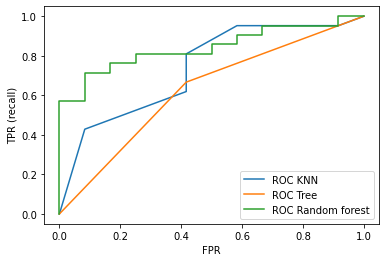

In [26]:
#ROC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])

plt.plot(fpr_knn, tpr_knn, label="ROC KNN")

plt.plot(fpr_tree, tpr_tree, label="ROC Tree")

plt.plot(fpr_rfc, tpr_rfc, label="ROC Random forest")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.legend(loc=4)